Topic:        Challenge Set 3
Subject:      Pandas
Date:         10/08/2018
Name:         Saif Maqbool

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 


In [66]:
mojo = pd.read_csv('/Users/smaq/ds/nyc18_ds17/challenges/challenges_data/2013_movies.csv')
mojo = pd.DataFrame(mojo)
mojo.head()


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [68]:
mojo.sort_values(['ReleaseDate'],inplace=True)

In [69]:
mojo.reset_index(inplace=True)

Text(0.5,1,'Domestic Gross 2016')

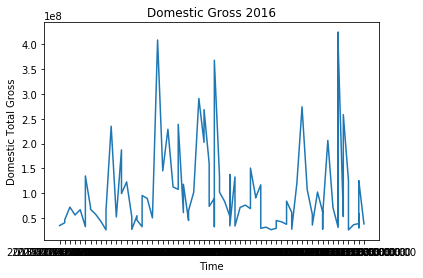

In [70]:
plt.plot(mojo['ReleaseDate'], mojo['DomesticTotalGross'])
plt.xlabel('Time')
plt.ylabel('Domestic Total Gross')
plt.title('Domestic Gross 2016')

Text(0.5,1,'Domestic Total Gross and Runtime 2013')

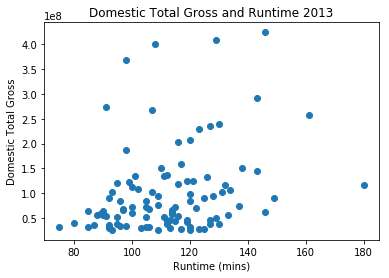

In [75]:
plt.scatter(mojo['Runtime'],mojo['DomesticTotalGross'])
plt.xlabel('Runtime (mins)')
plt.ylabel('Domestic Total Gross')
plt.title('Domestic Total Gross and Runtime 2013')

In [105]:
mojo.groupby('Rating')['Runtime','DomesticTotalGross'].mean()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


In [110]:
mojo[mojo.Rating == 'PG']['ReleaseDate'].head

<bound method NDFrame.head of 10    2013-02-15 00:00:00
14    2013-03-08 00:00:00
16    2013-03-22 00:00:00
31    2013-05-24 00:00:00
45    2013-07-03 00:00:00
48    2013-07-17 00:00:00
54    2013-07-31 00:00:00
56    2013-08-07 00:00:00
59    2013-08-09 00:00:00
64    2013-08-30 00:00:00
71    2013-09-27 00:00:00
80    2013-11-01 00:00:00
86    2013-11-22 00:00:00
93    2013-12-20 00:00:00
95    2013-12-25 00:00:00
Name: ReleaseDate, dtype: object>

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.



Text(0.5,1,'Domestic Total Gross and Release Date 2013')

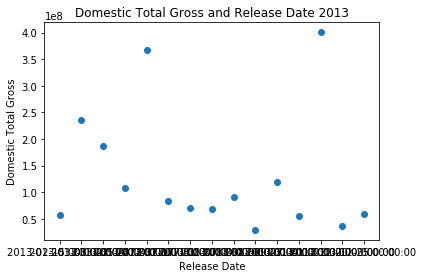

In [111]:
plt.scatter(mojo[mojo.Rating == 'PG']['ReleaseDate'],mojo[mojo.Rating == 'PG']['DomesticTotalGross'])
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross')
plt.title('Domestic Total Gross and Release Date 2013')

In [113]:
mojo.Rating.unique()

array(['R', 'PG-13', 'PG', 'G'], dtype=object)

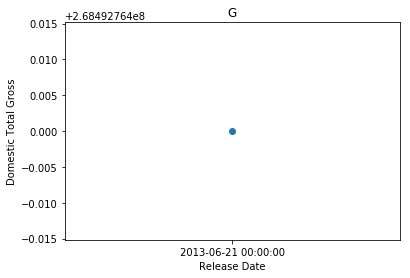

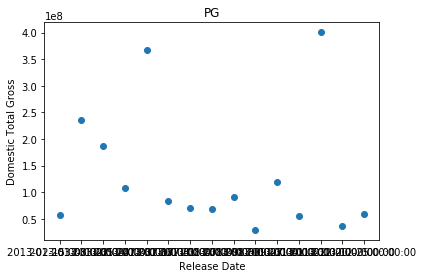

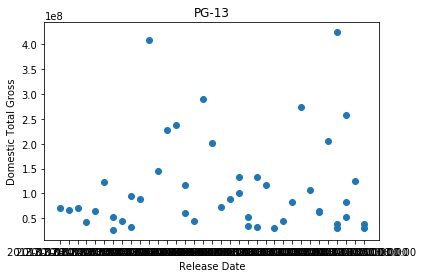

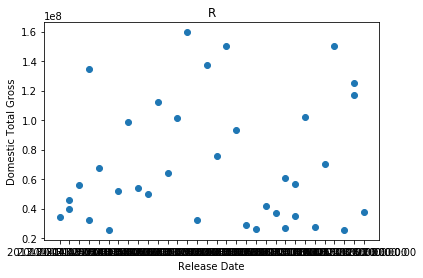

In [175]:
plt.scatter(mojo[mojo.Rating == 'G']['ReleaseDate'],mojo[mojo.Rating == 'G']['DomesticTotalGross'])
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross')
plt.title('G')
plt.show();

plt.scatter(mojo[mojo.Rating == 'PG']['ReleaseDate'],mojo[mojo.Rating == 'PG']['DomesticTotalGross'])
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross')
plt.title('PG')
plt.show();

plt.scatter(mojo[mojo.Rating == 'PG-13']['ReleaseDate'],mojo[mojo.Rating == 'PG-13']['DomesticTotalGross'])
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross')
plt.title('PG-13')
plt.show();

plt.scatter(mojo[mojo.Rating == 'R']['ReleaseDate'],mojo[mojo.Rating == 'R']['DomesticTotalGross'])
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross')
plt.title('R')
plt.show();

In [197]:
top_director = mojo.groupby(['Director']).agg({'Title': 'count', 'DomesticTotalGross': np.sum}).sort_values('DomesticTotalGross',ascending=False).head(1)
top_director

,Title,DomesticTotalGross
Director,,
Francis Lawrence,1,424668047


In [182]:
mojo['ReleaseMonth'] = mojo['ReleaseDate'].apply(pd.to_datetime)

In [184]:
relmonth = lambda x: x.month

In [185]:
mojo['ReleaseMonth'] = mojo['ReleaseMonth'].apply(relmonth)

In [210]:
mojo.head()
mean_grosses = []
for x in list(mojo['ReleaseMonth'].unique()):
    mojo_months = mojo[mojo['ReleaseMonth'] == x]
    mean_grosses.append(np.mean(mojo_months['DomesticTotalGross']))
    


Text(0.5,1,'Mean Domestic Total Gross by Month in 2013')

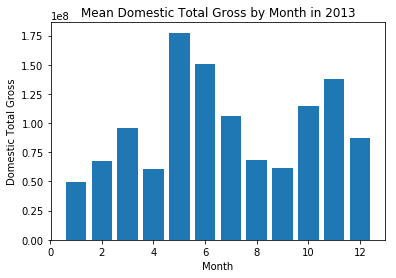

In [209]:
plt.bar(list(mojo['ReleaseMonth'].unique()), mean_grosses)
plt.ylabel('Domestic Total Gross')
plt.xlabel('Month')
plt.title('Mean Domestic Total Gross by Month in 2013')